In [15]:
using Plots, Plots.Measures, Printf
default(size=(1200, 400), framestyle=:box, label=false, grid=false, margin=10mm, lw=6, labelfontsize=20, tickfontsize=20, titlefontsize=24)

@views function diffusion_1D_conv()
    # physics
    lx   = 20.0
    dc   = 1.0
    ρ = 20.0
    # numerics
    nx      = 200
    ϵtol    = 1e-8
    maxiter = 20nx
    ncheck  = ceil(Int,0.25nx)
    # derived numerics
    dx   = lx / nx
    dt   = dx/sqrt(1/ρ) / 1.1
    nt   = 5nx
    xc   = LinRange(dx / 2, lx - dx / 2, nx)
    # array initialisation
    C    = @. 1.0 + exp(-(xc-lx/4)^2) - xc/lx
    C_i  = copy(C)
    qx   = zeros(Float64, nx - 1)
    # time loop

    iter = 1; err = 2ϵtol; iter_evo = Float64[]; err_evo = Float64[]
    while err >= ϵtol && iter <= maxiter
        #ρ dq/dt + q/dc = .-diff(C) ./ dx
        #ρ .* dc .* (q .- q_prev) ./ dt + q_prev = .-dc .* diff(C) ./ dx
        #q .-= dt / (ρ * dc) .* -dc .* diff(C) ./ dx
        qx          .-= dt / (ρ * dc) .* (qx .+ dc .* diff(C) ./ dx)
        C[2:end-1] .-= dt .* diff(qx) ./ dx
        
        if iter % ncheck == 0
            err = maximum(abs.(diff(dc.*diff(C)./dx)./dx))
            push!(iter_evo,iter/nx); push!(err_evo,err)
            p1 = plot(xc,[C_i,C];xlims=(0,lx),ylims=(-0.1,2.0),
                    xlabel="lx",ylabel="Concentration",title="iter/nx=$(round(iter/nx,sigdigits=3))")
            p2 = plot(iter_evo,err_evo;xlabel="iter/nx",ylabel="err",
                    yscale=:log10,grid=true,markershape=:circle,markersize=10)
            display(plot(p1,p2;layout=(2,1), size=(1000,800)))
        end
        iter += 1
        
    end 
end

diffusion_1D_conv (generic function with 1 method)

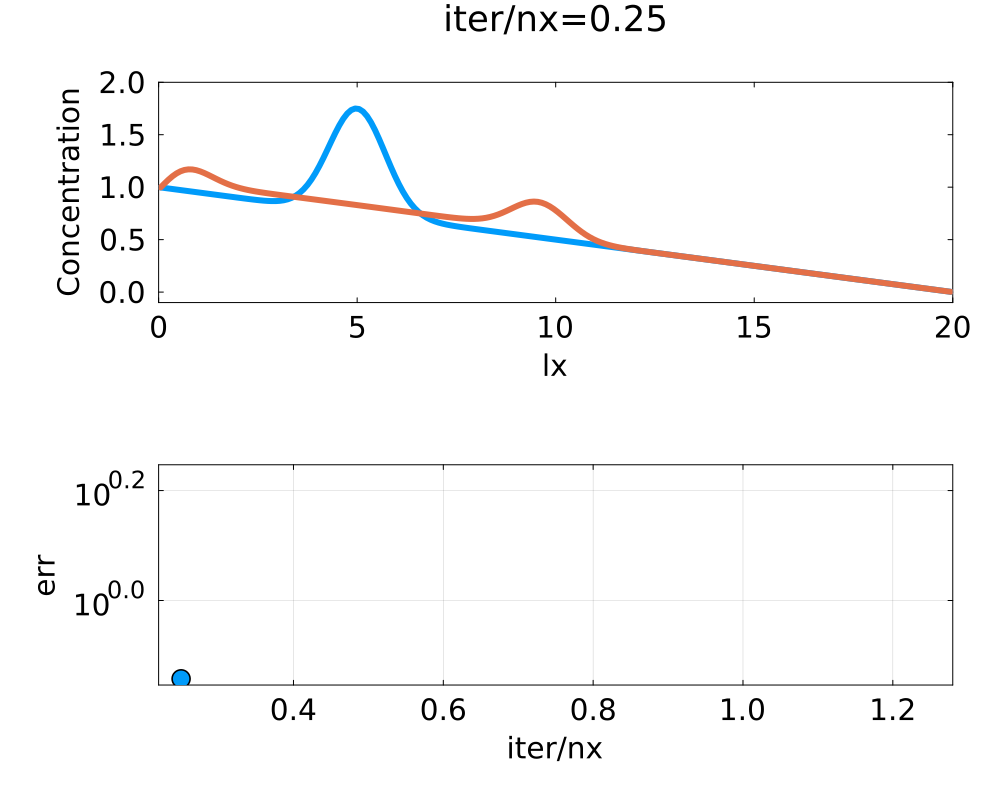

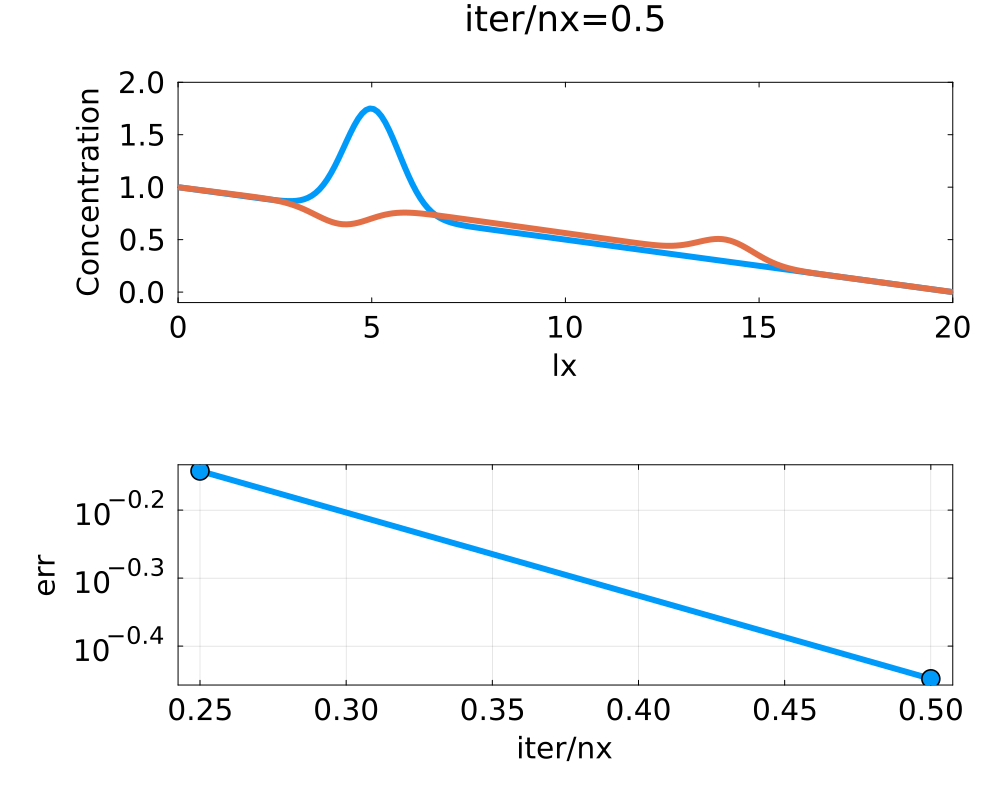

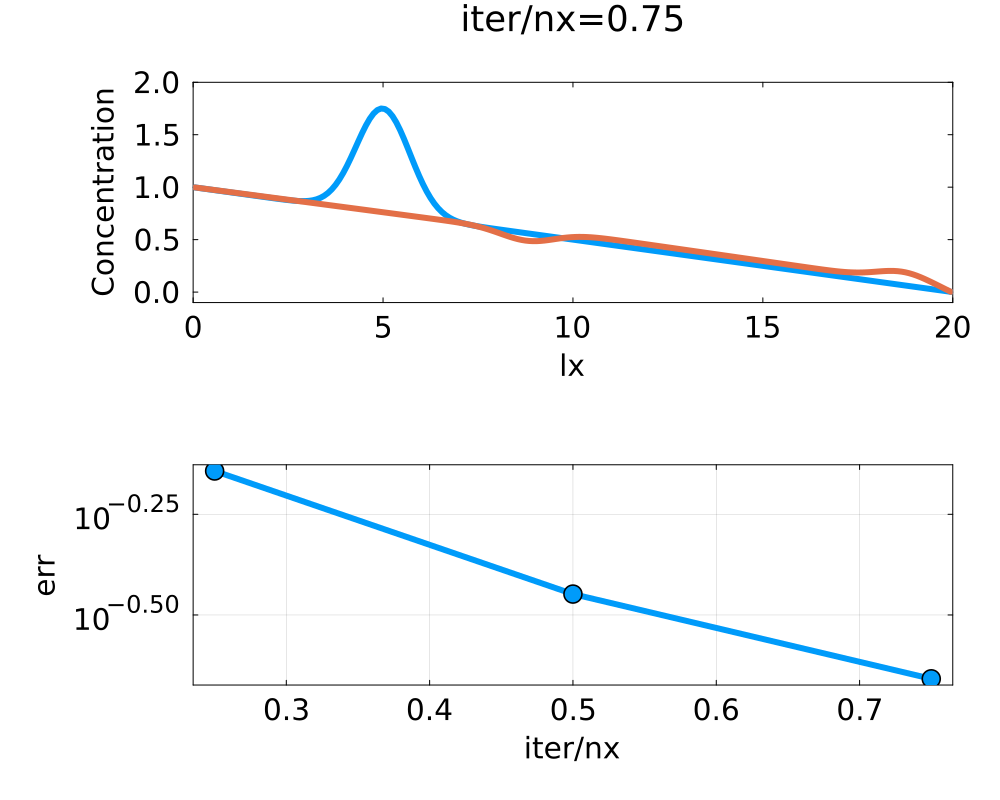

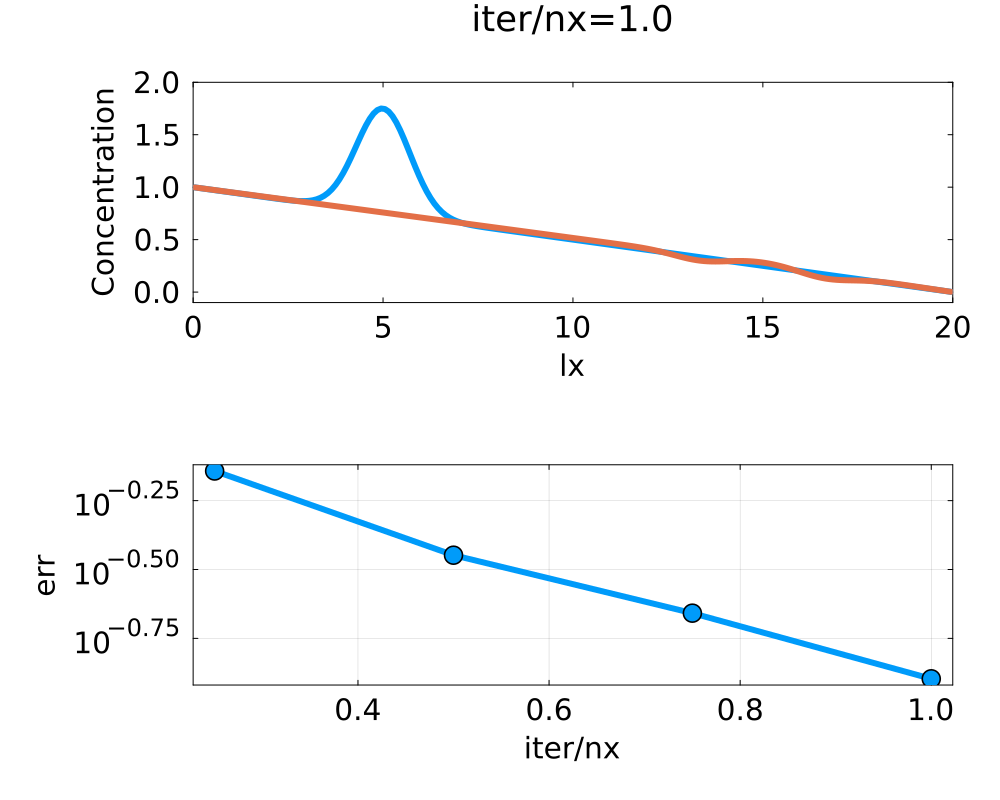

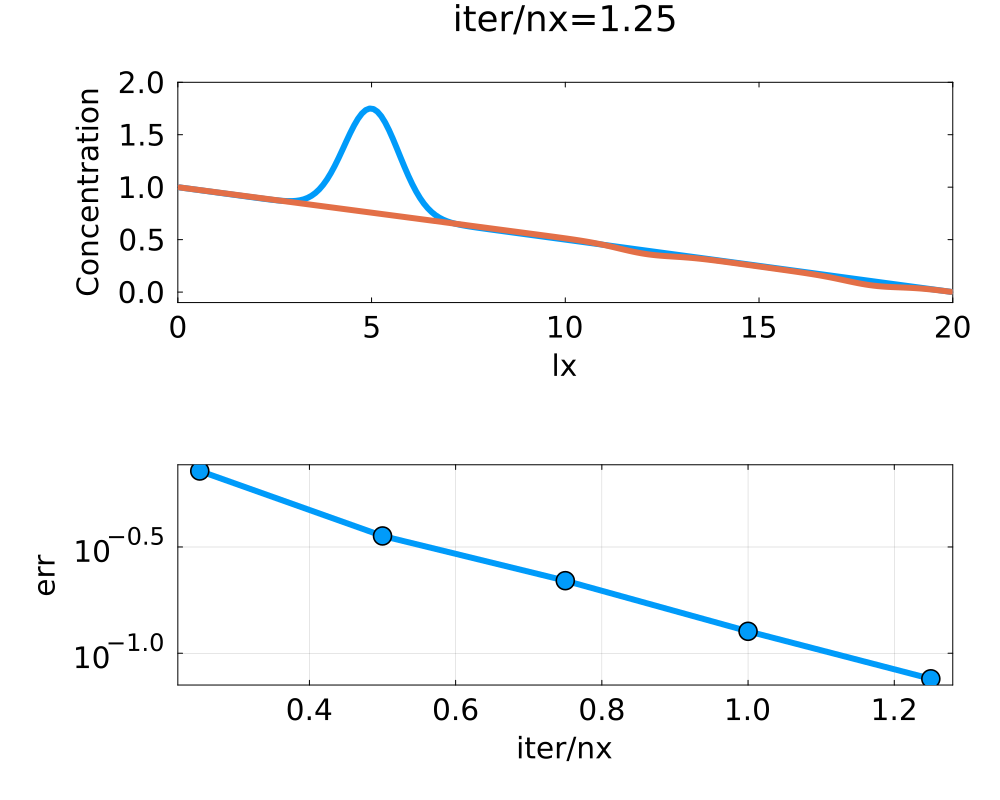

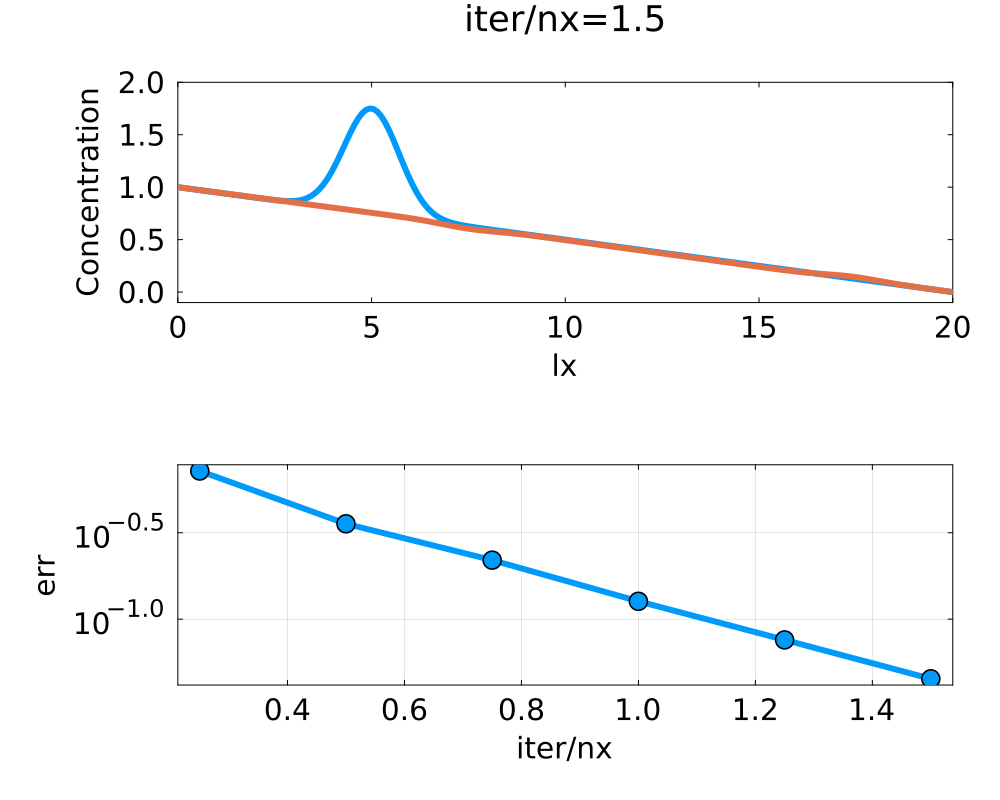

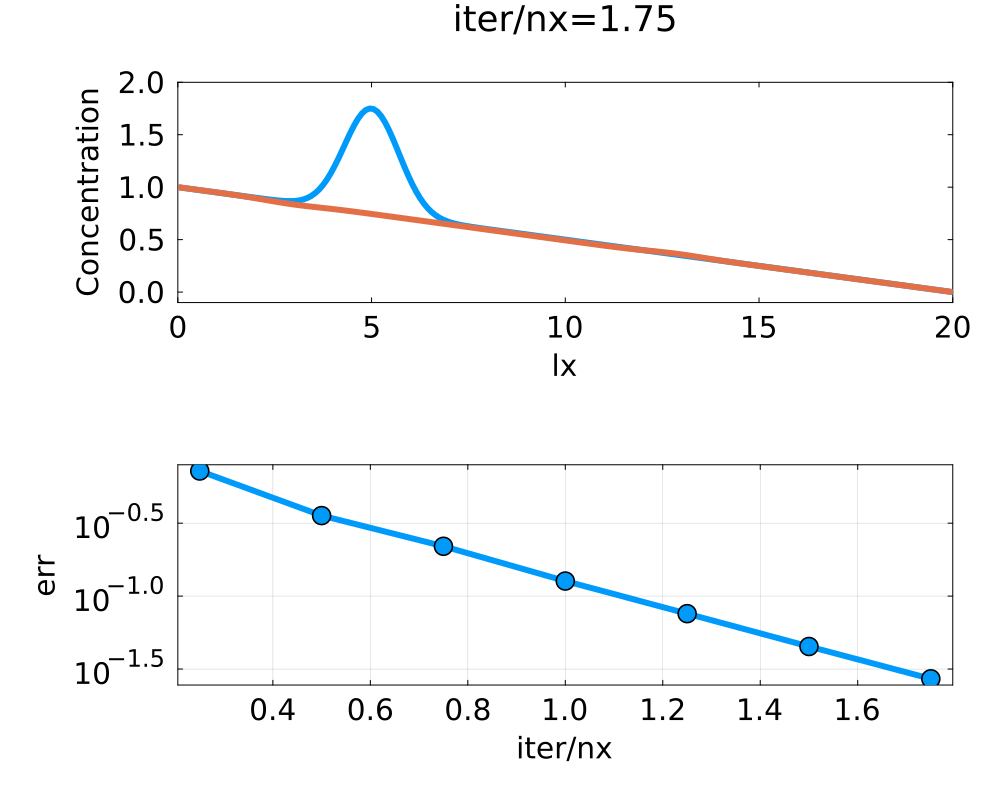

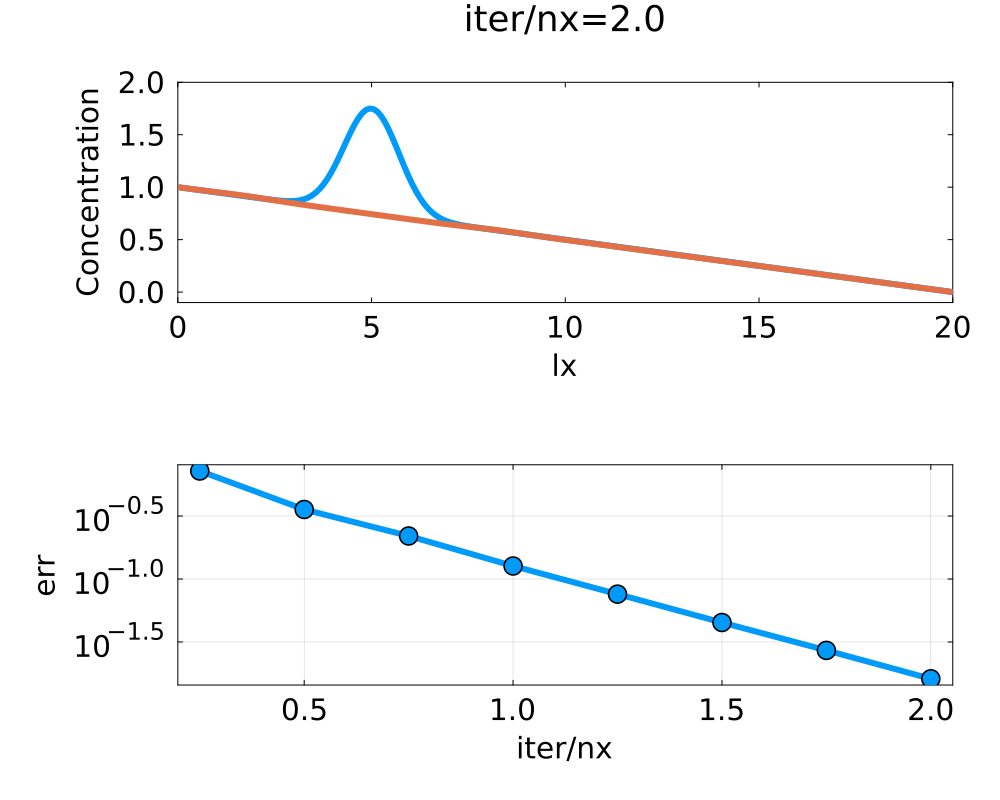

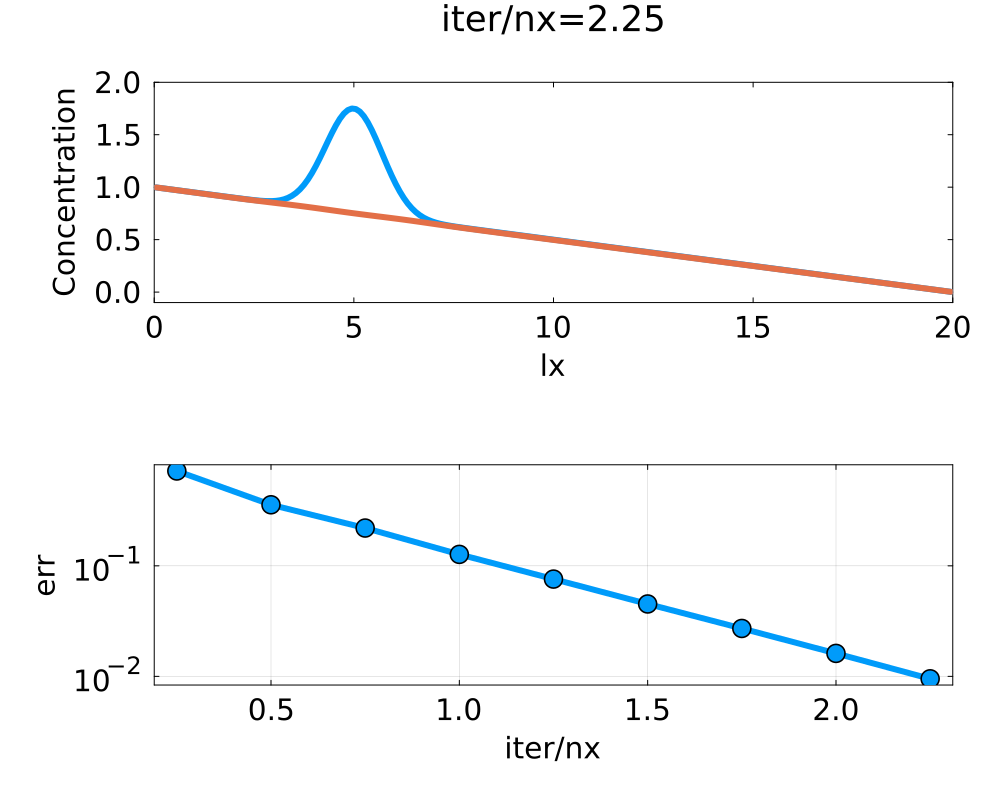

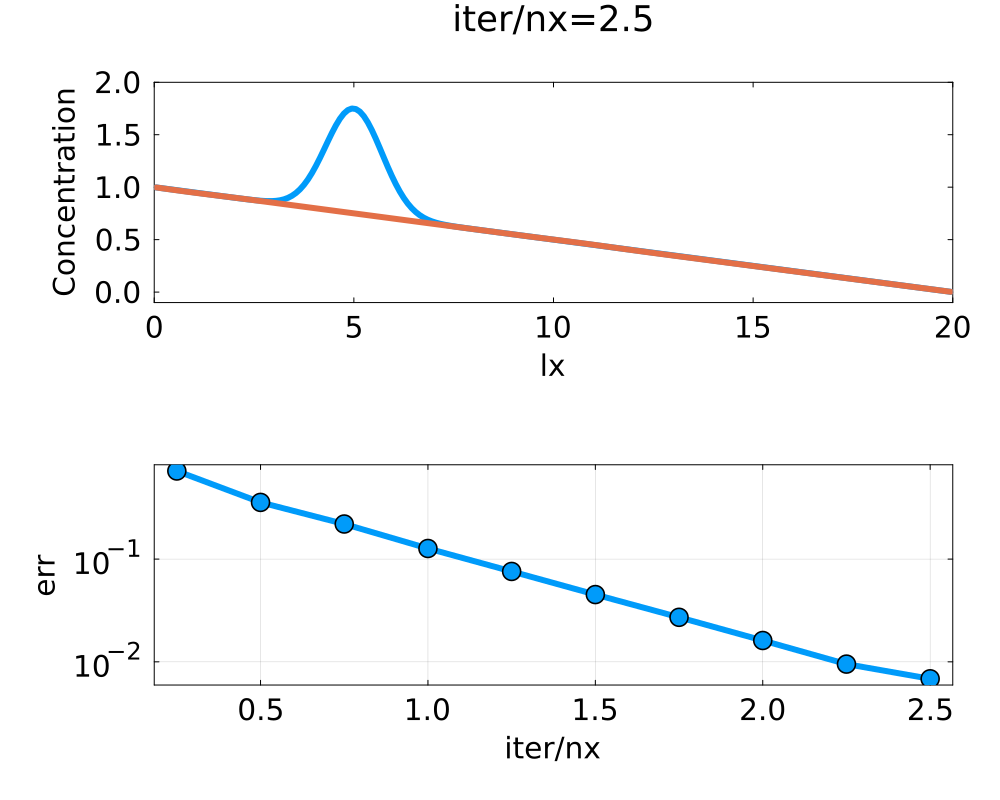

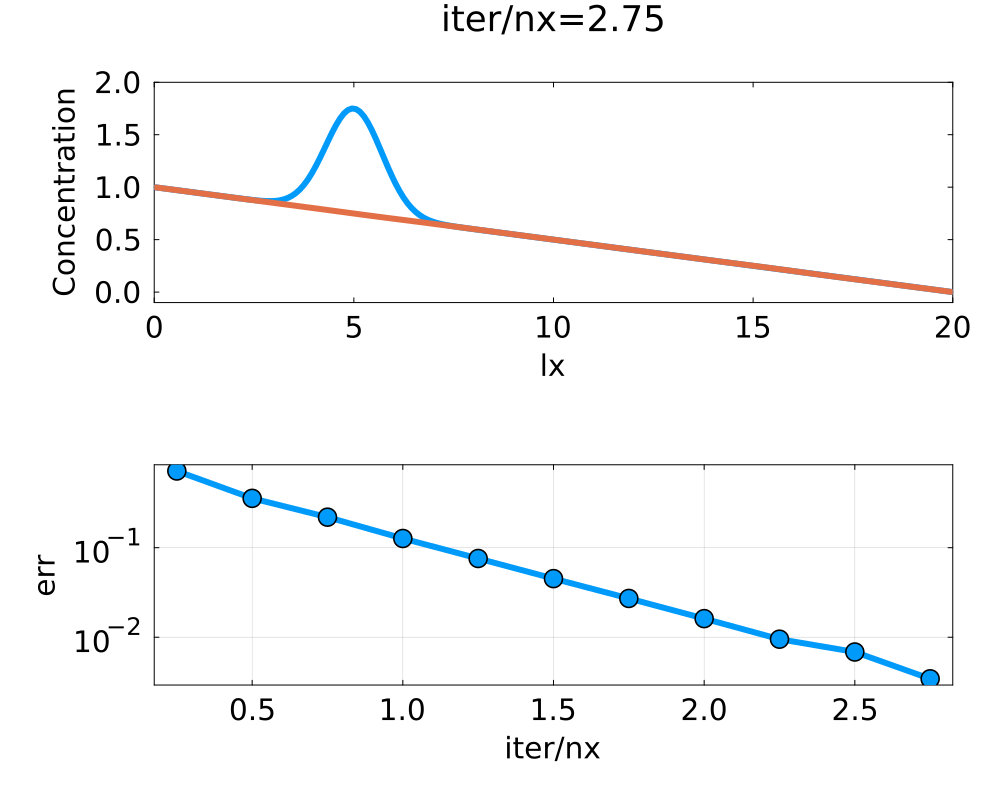

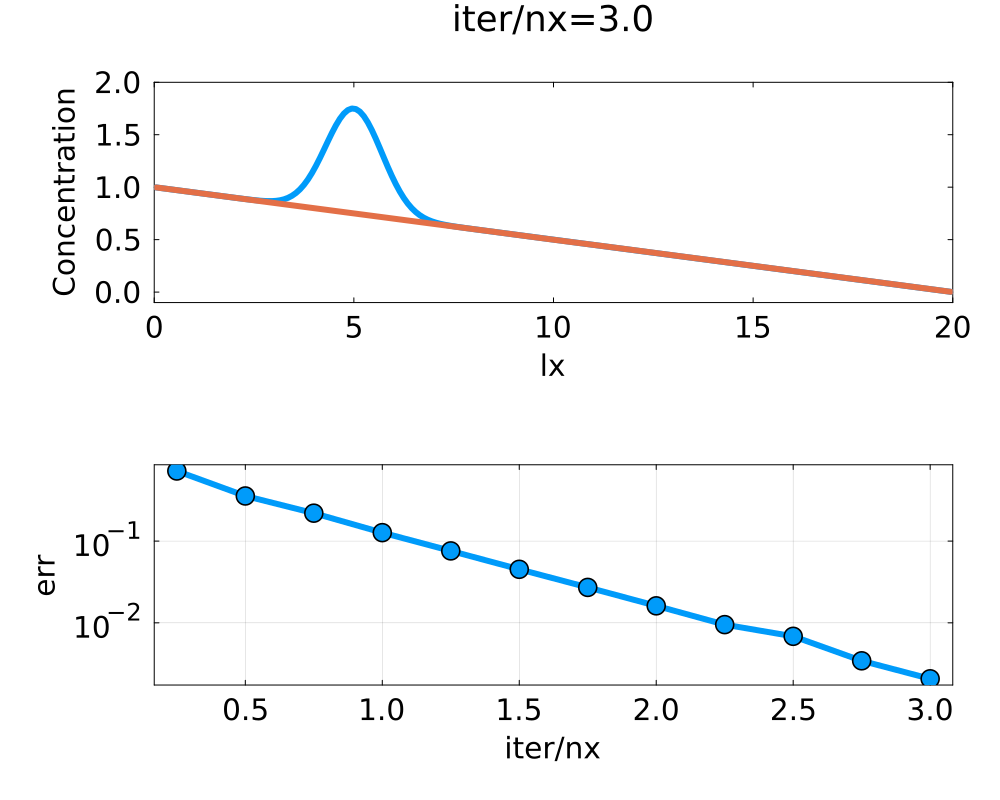

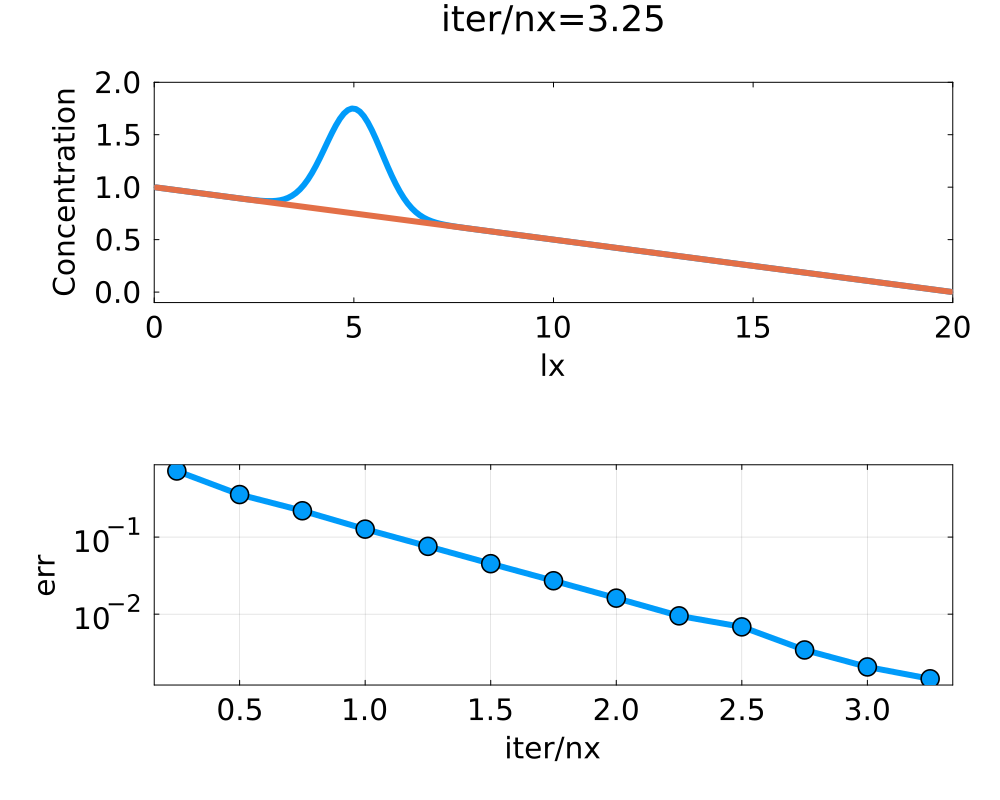

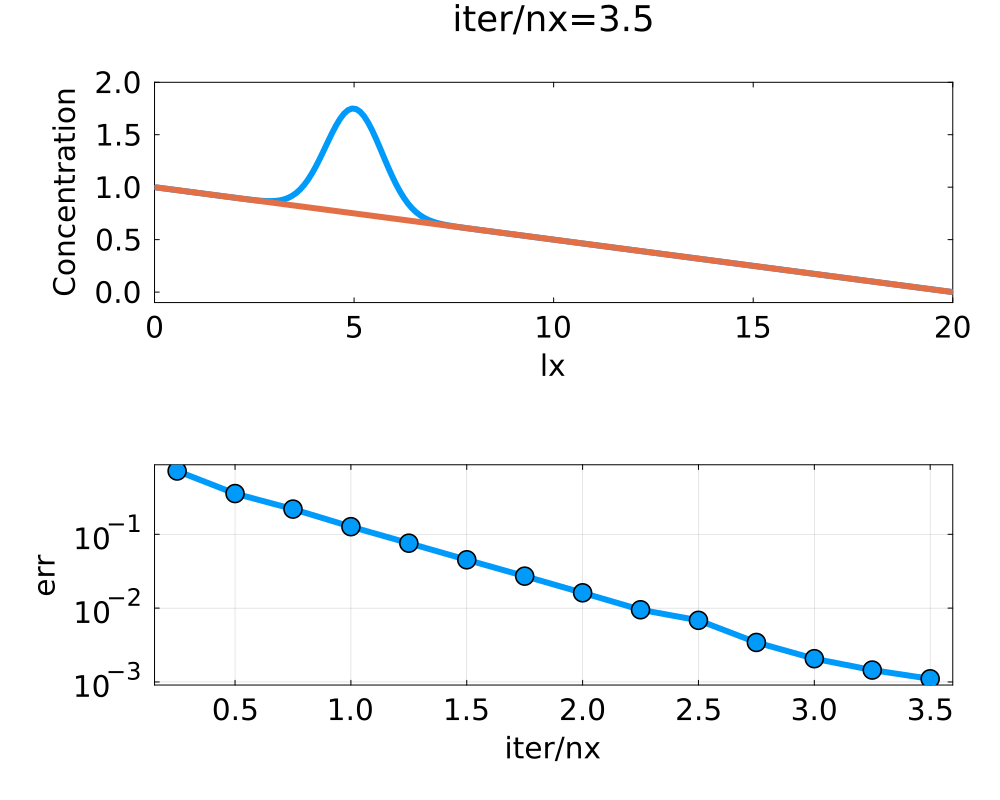

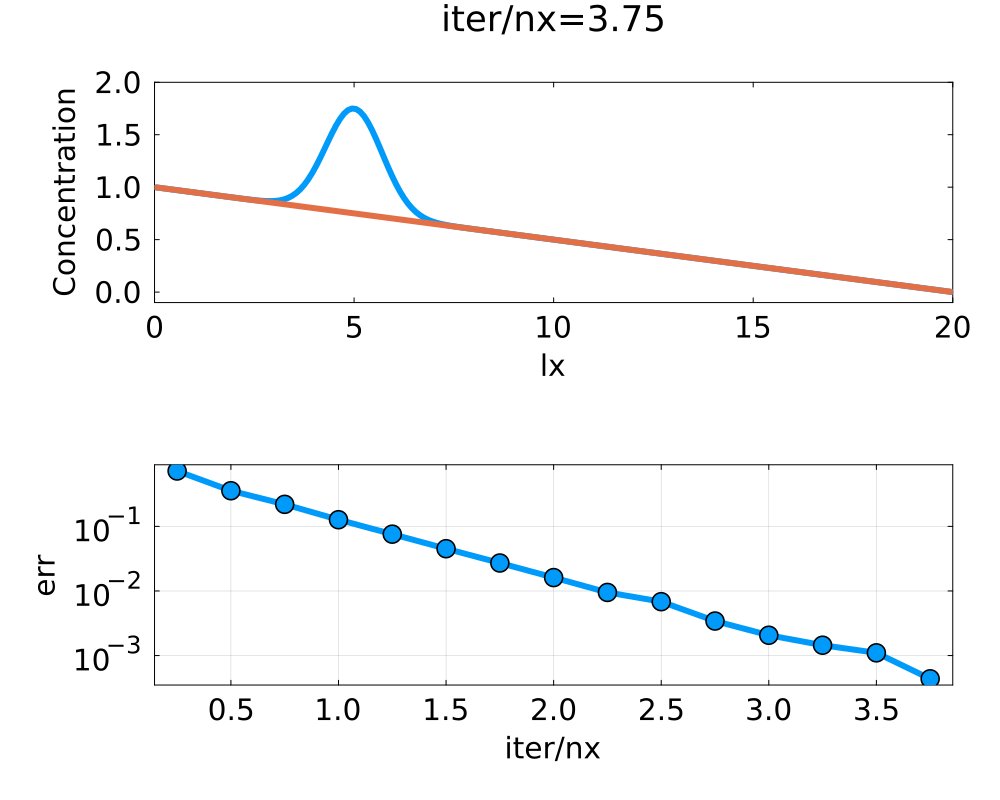

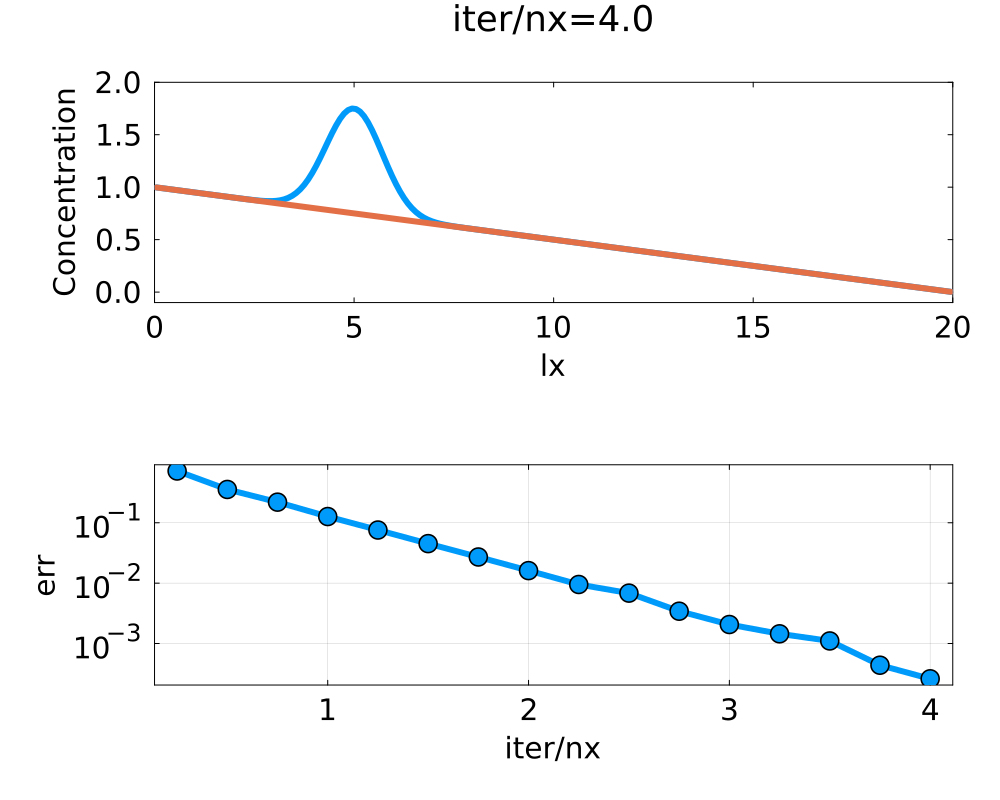

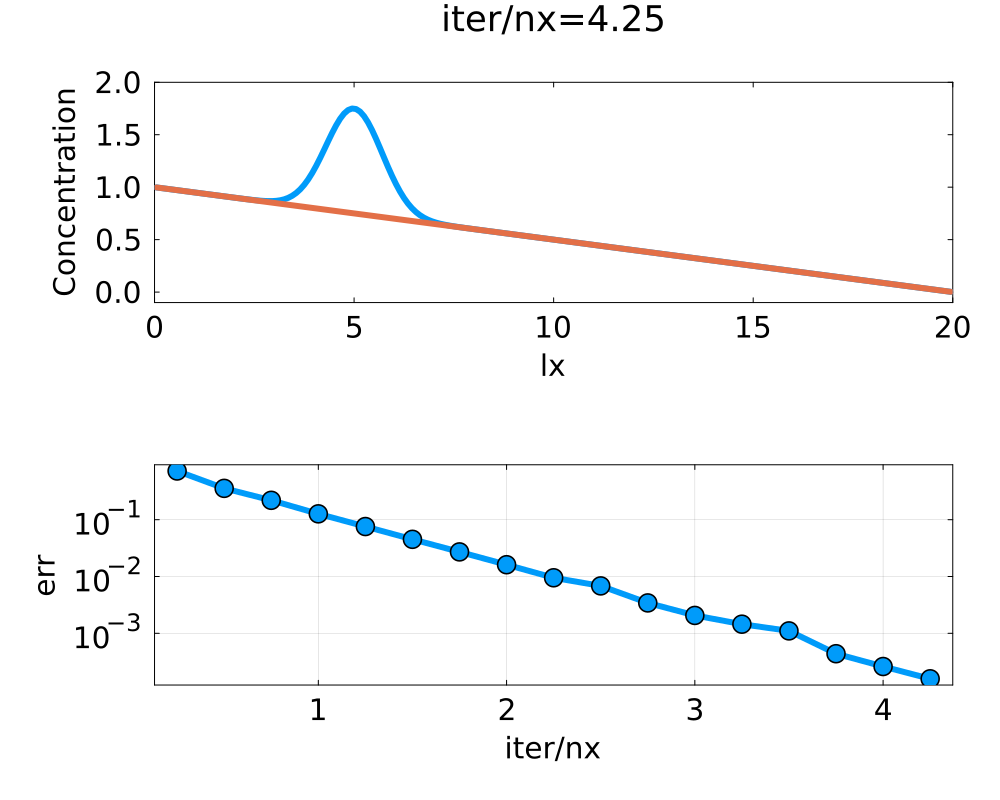

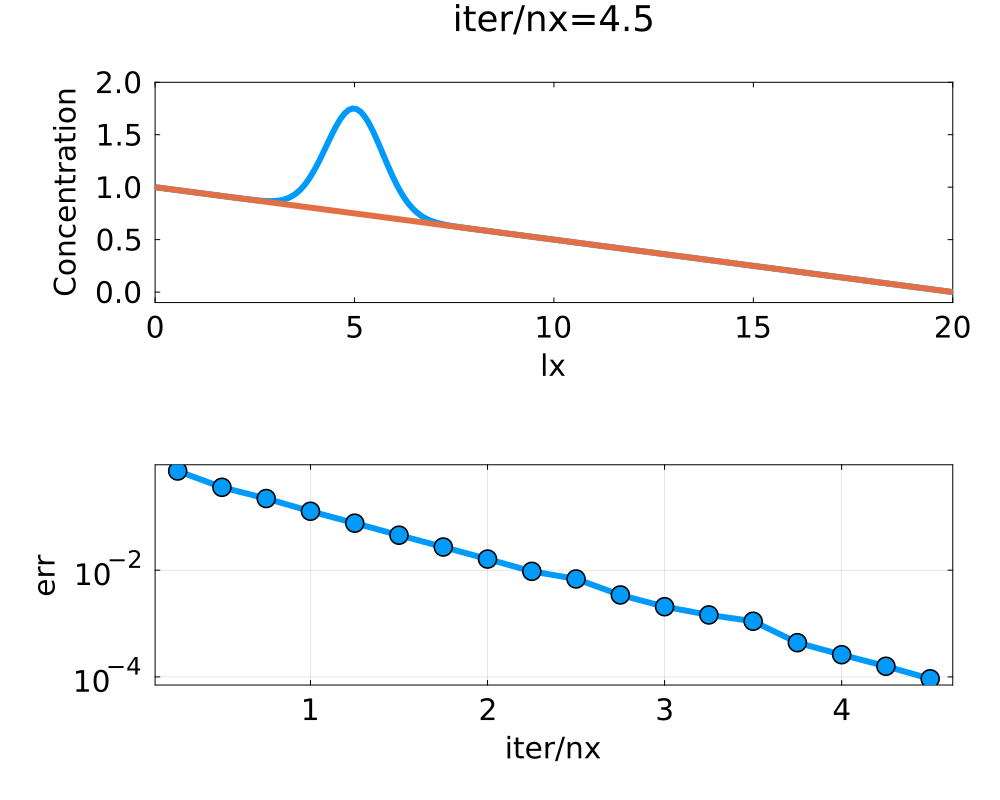

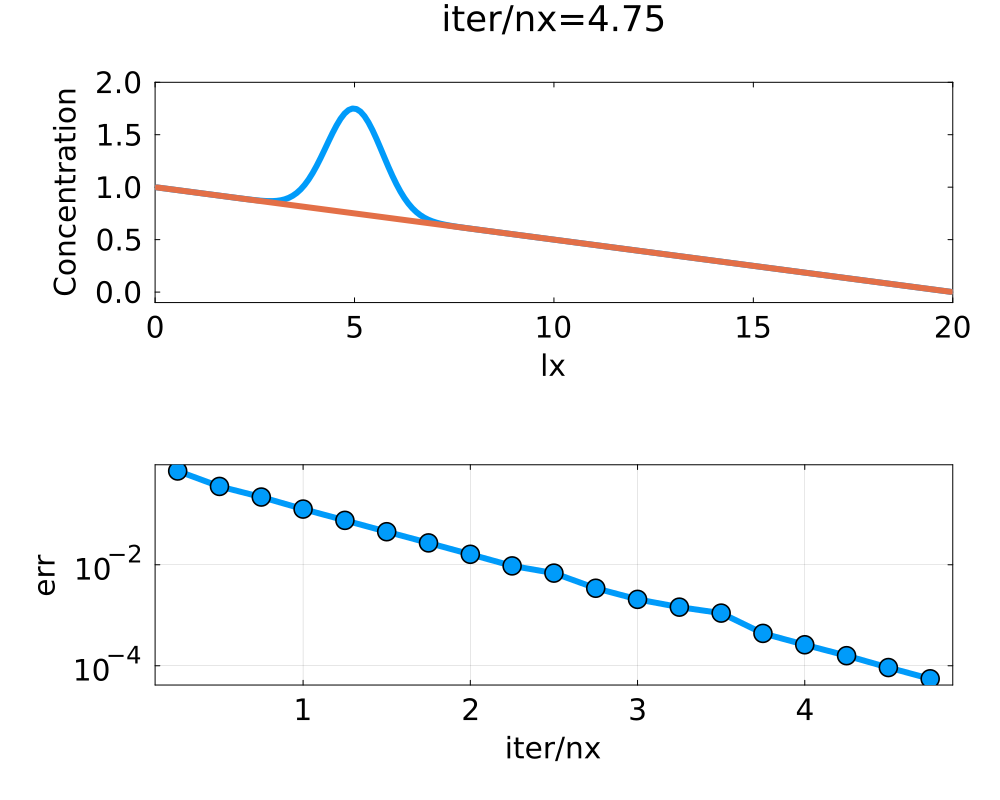

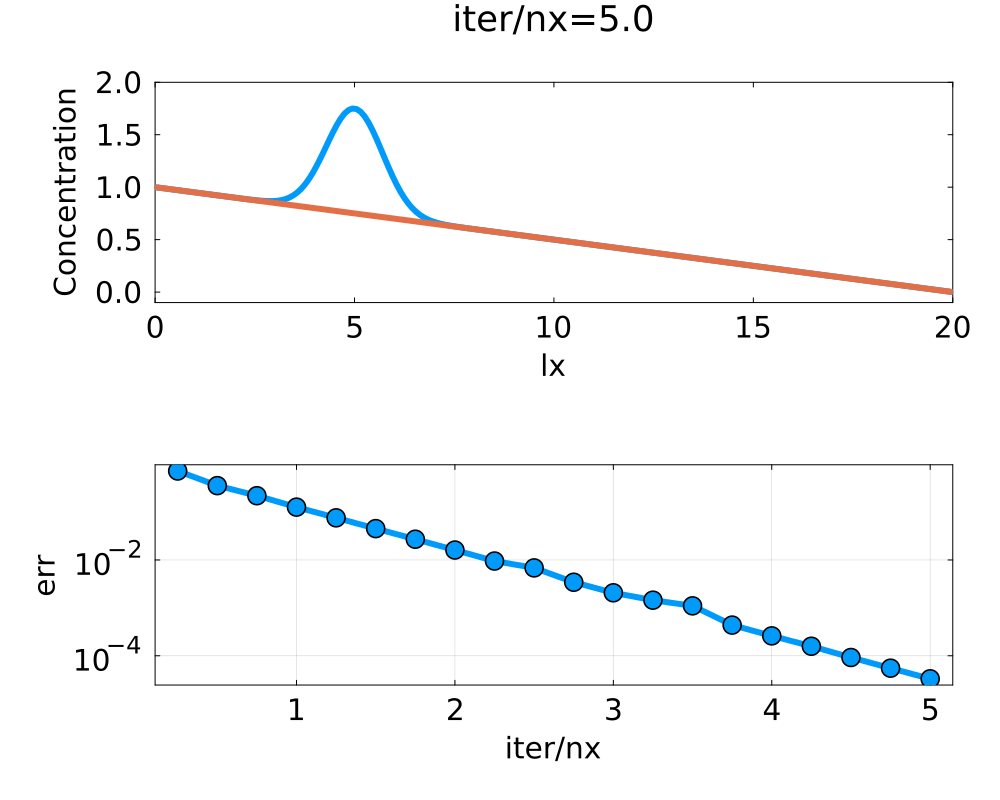

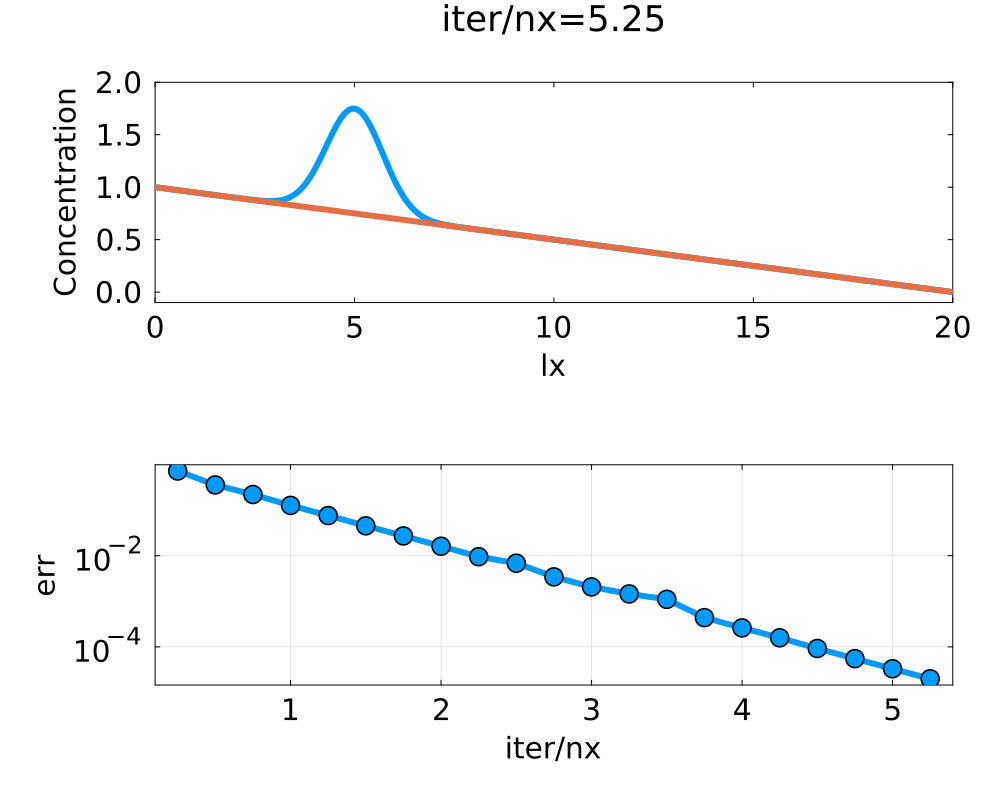

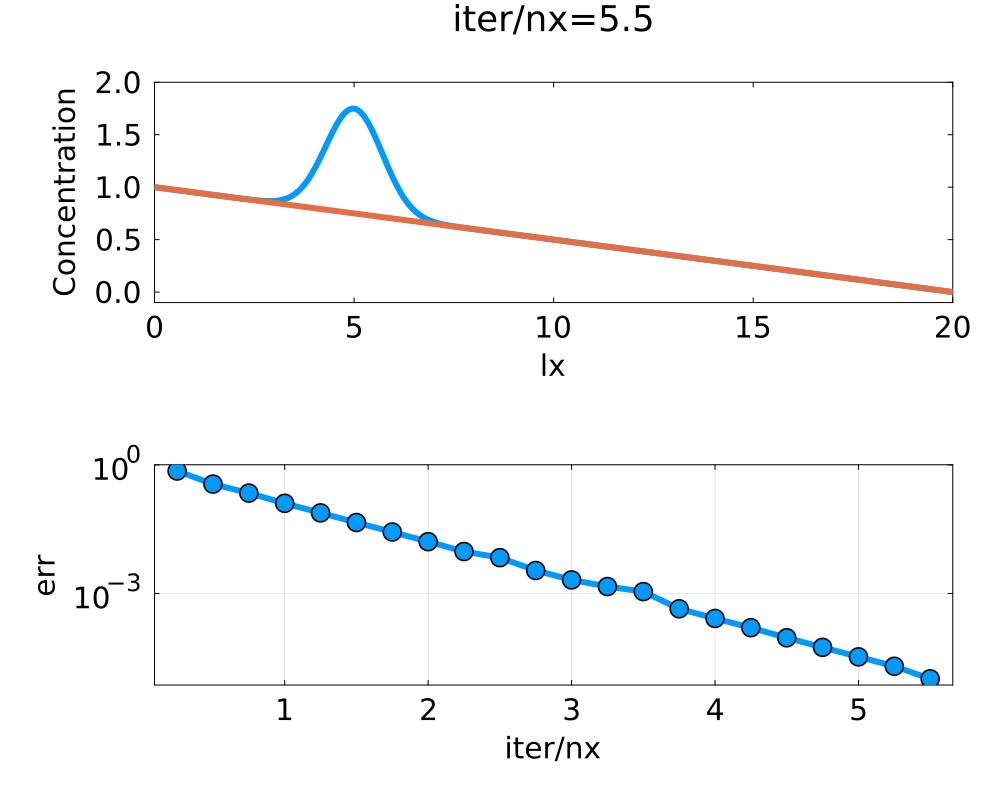

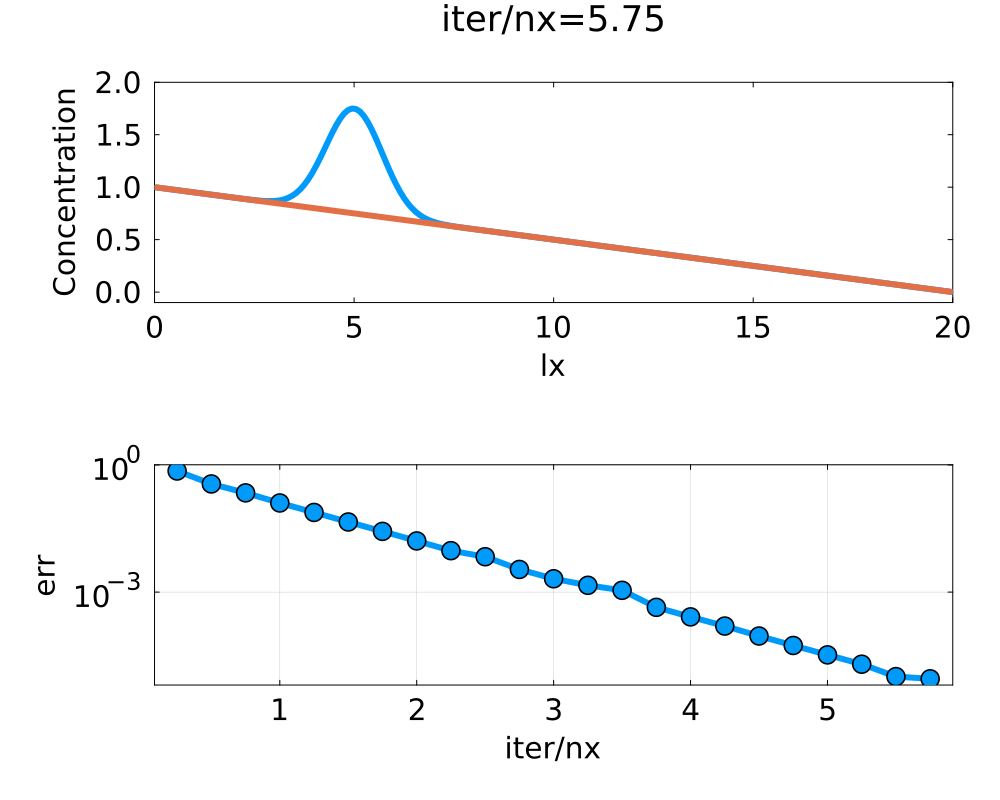

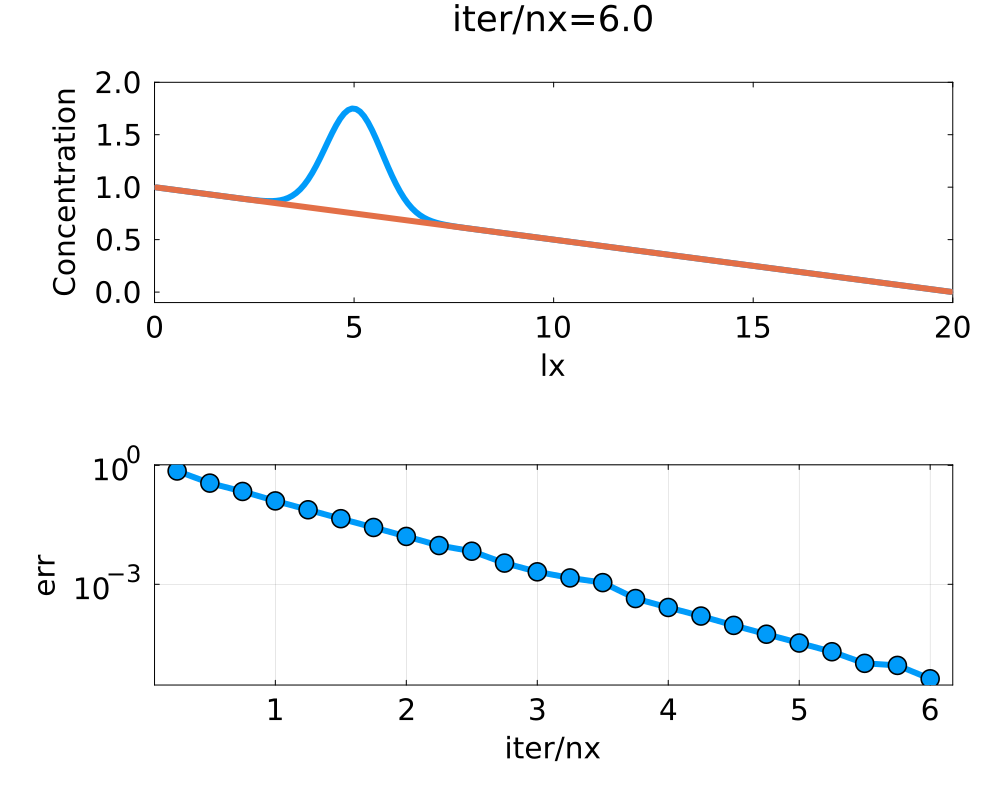

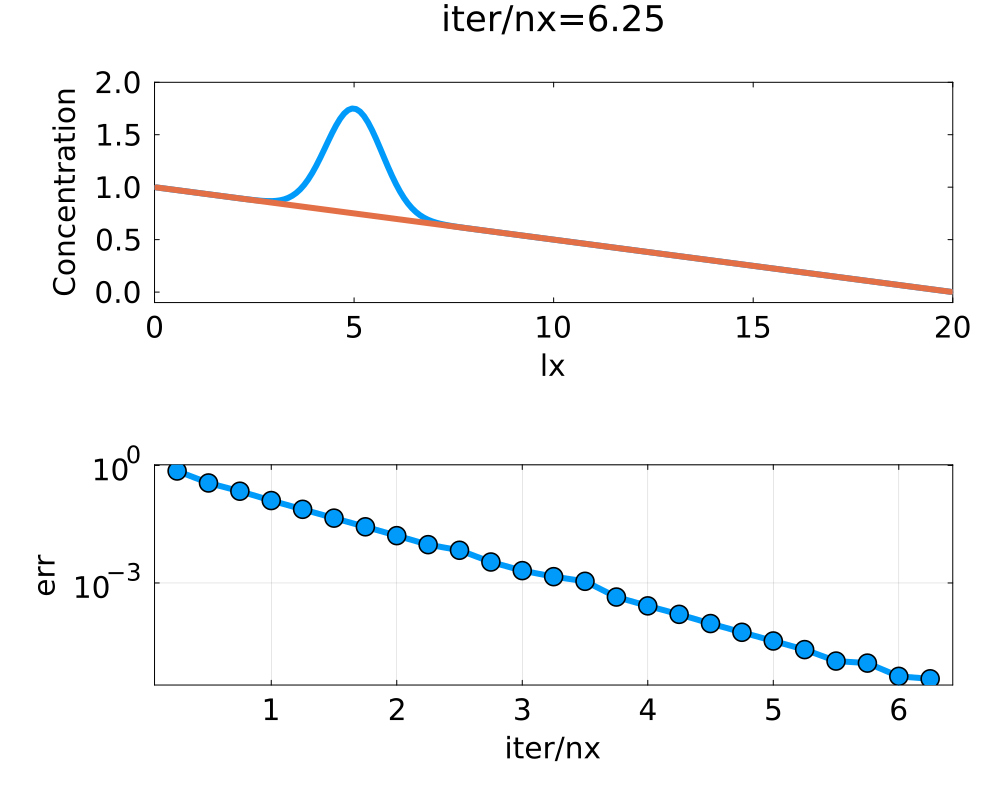

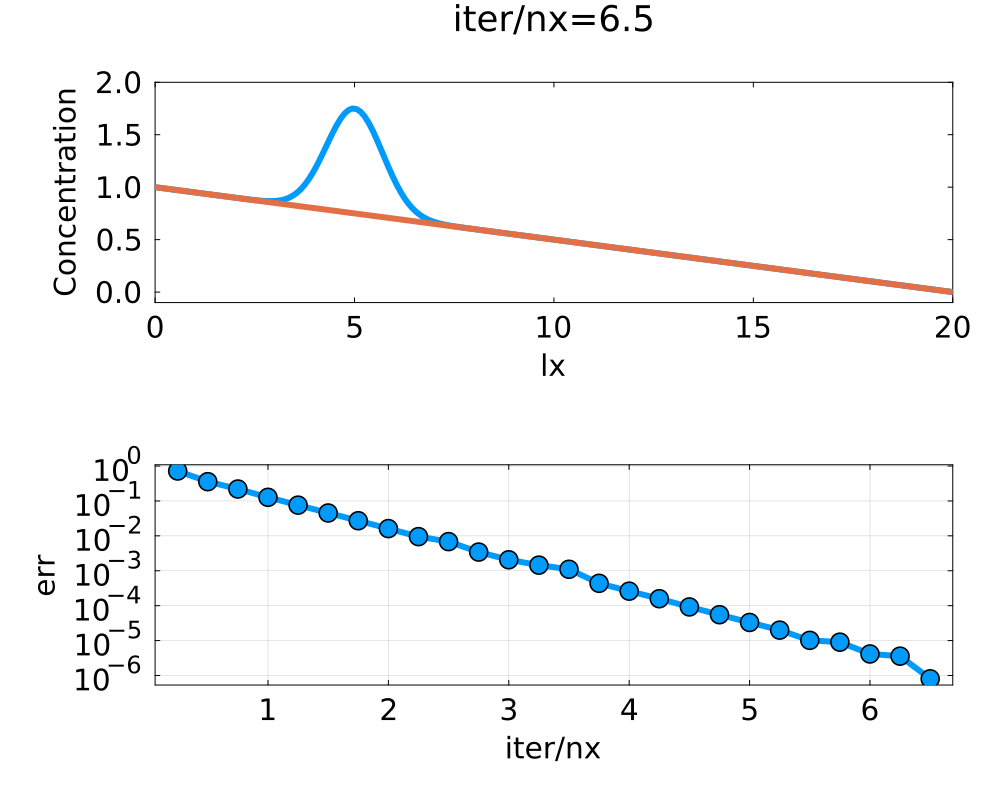

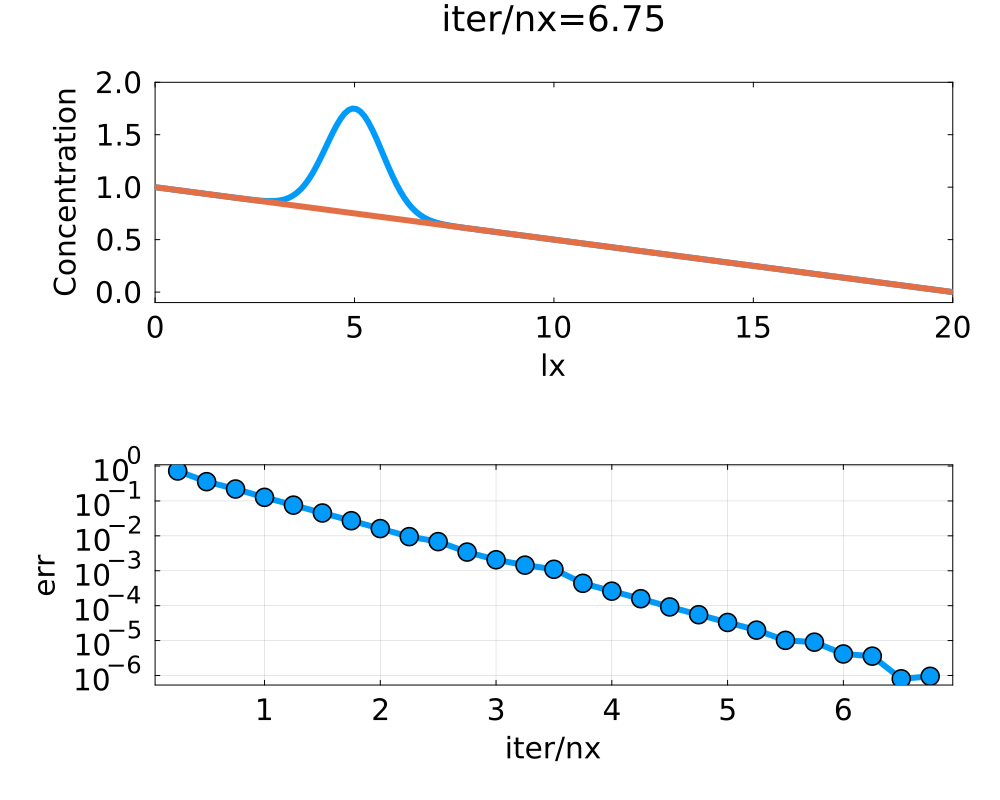

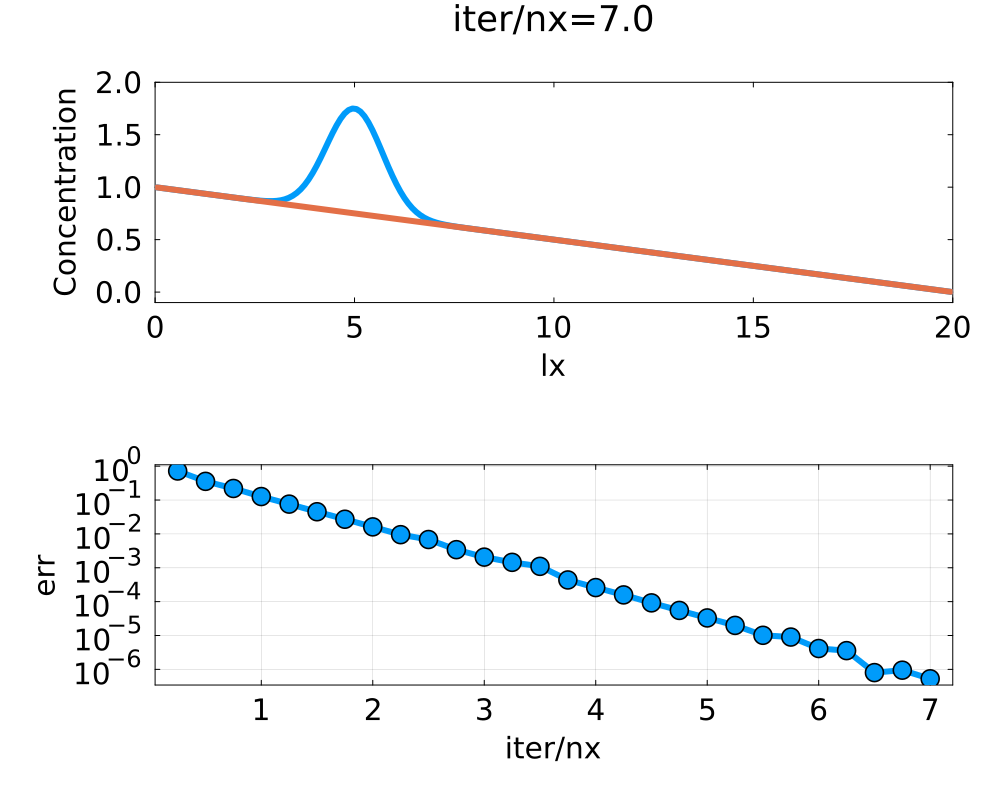

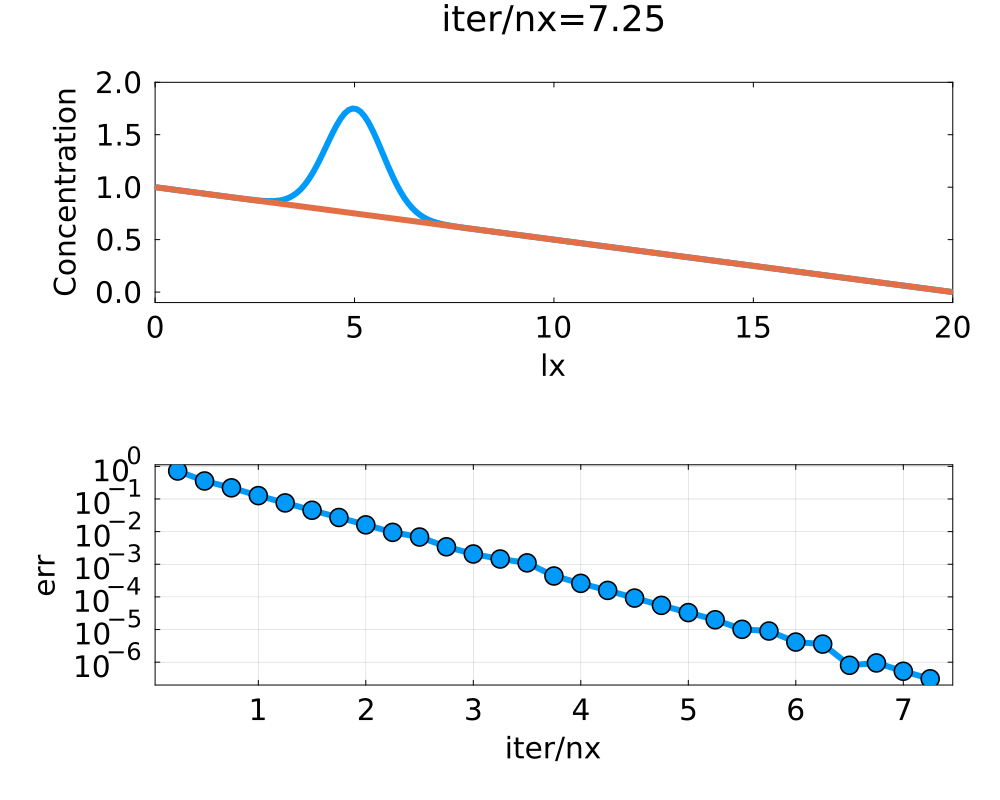

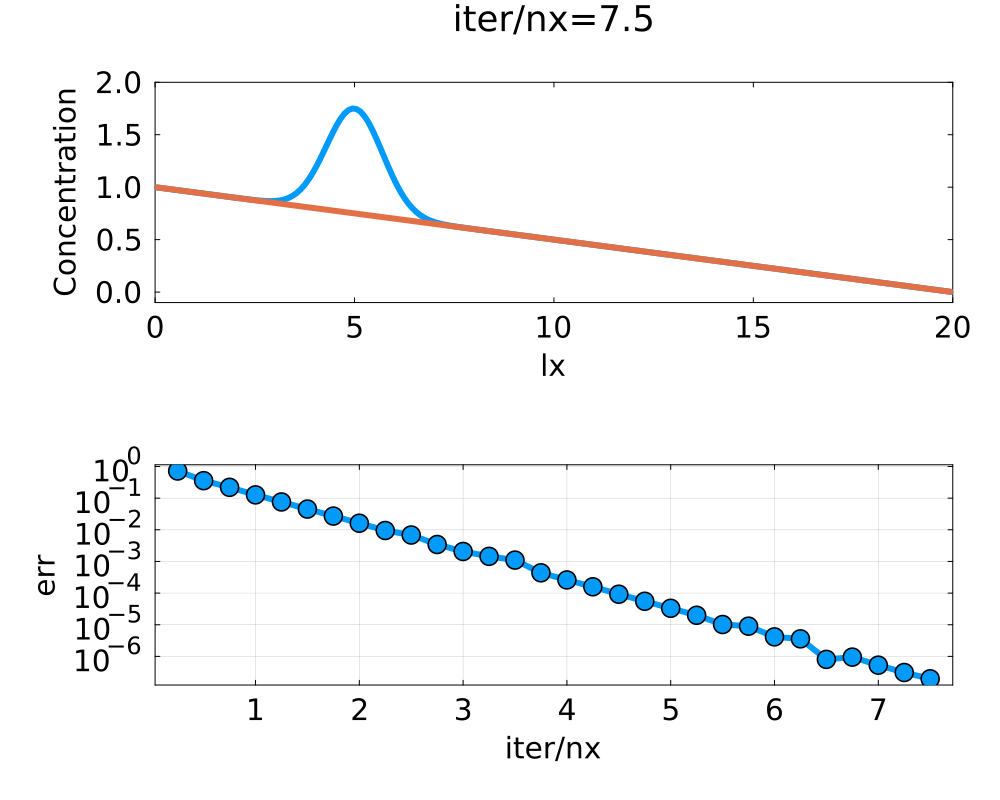

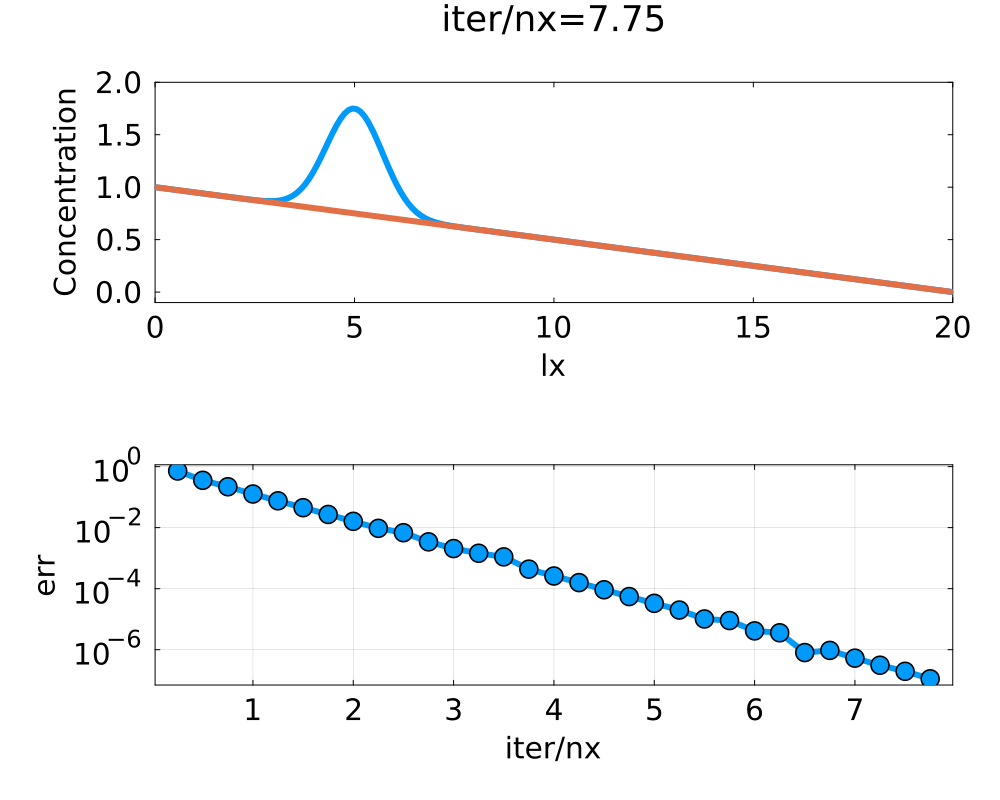

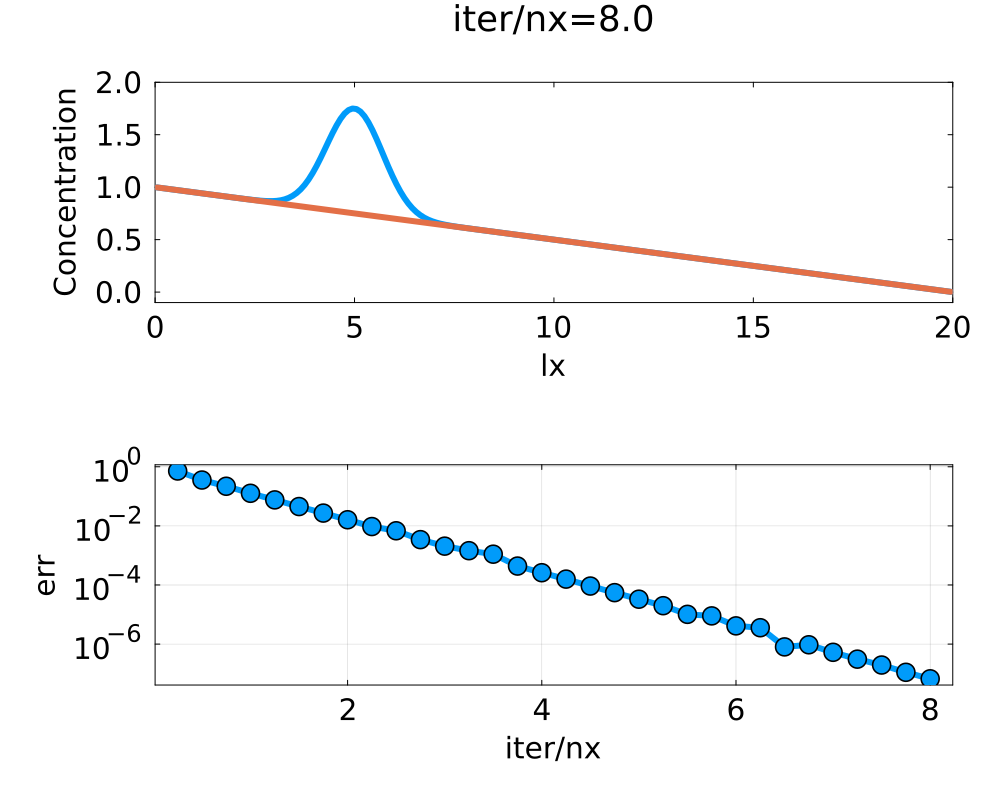

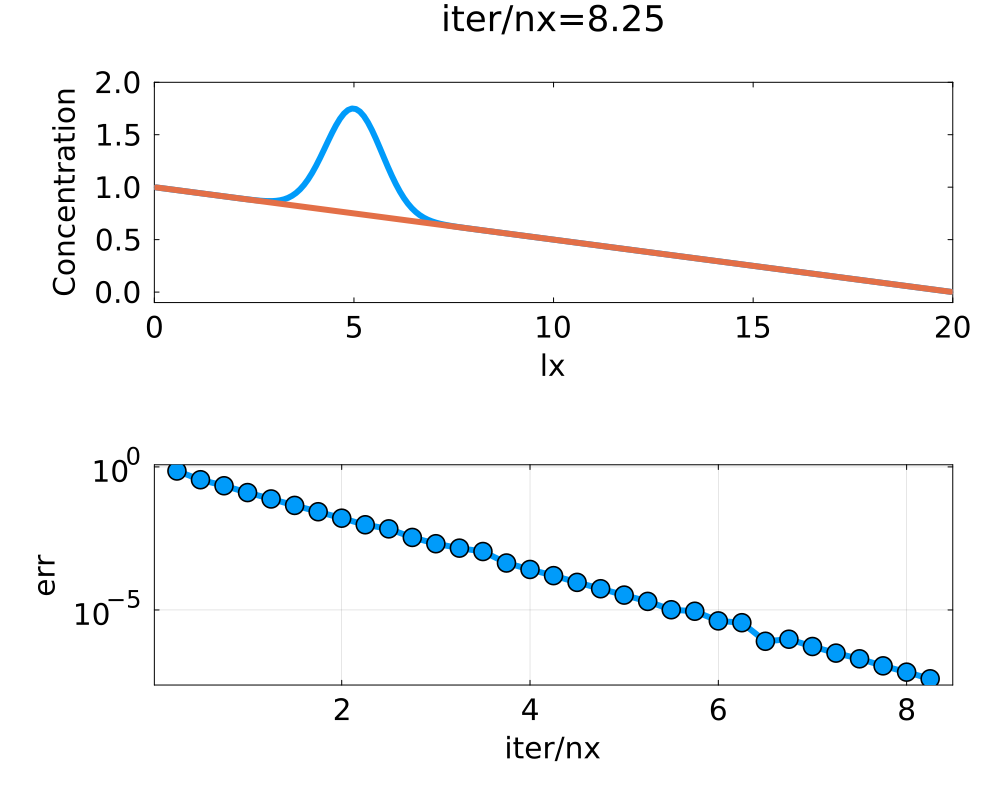

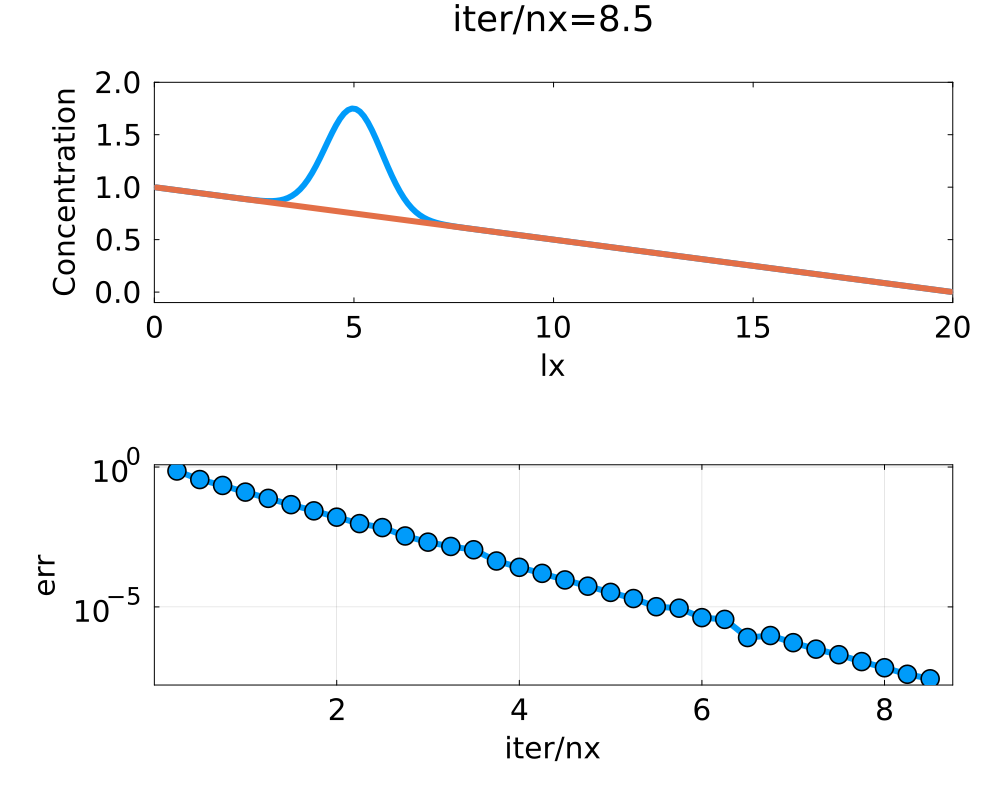

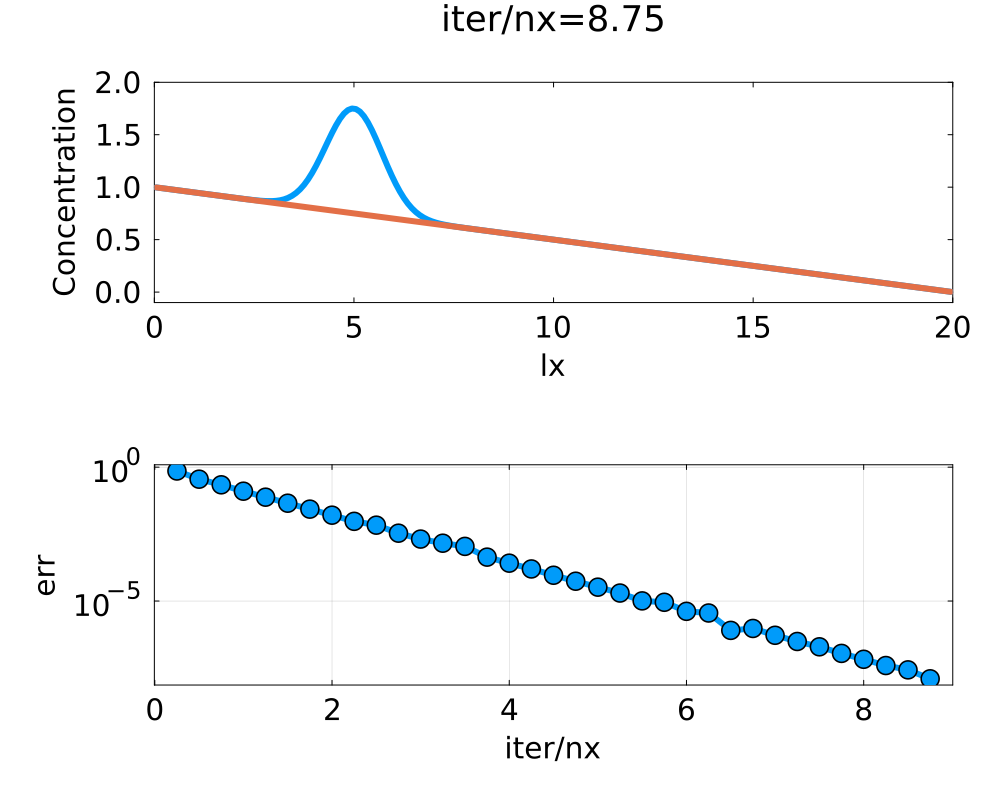

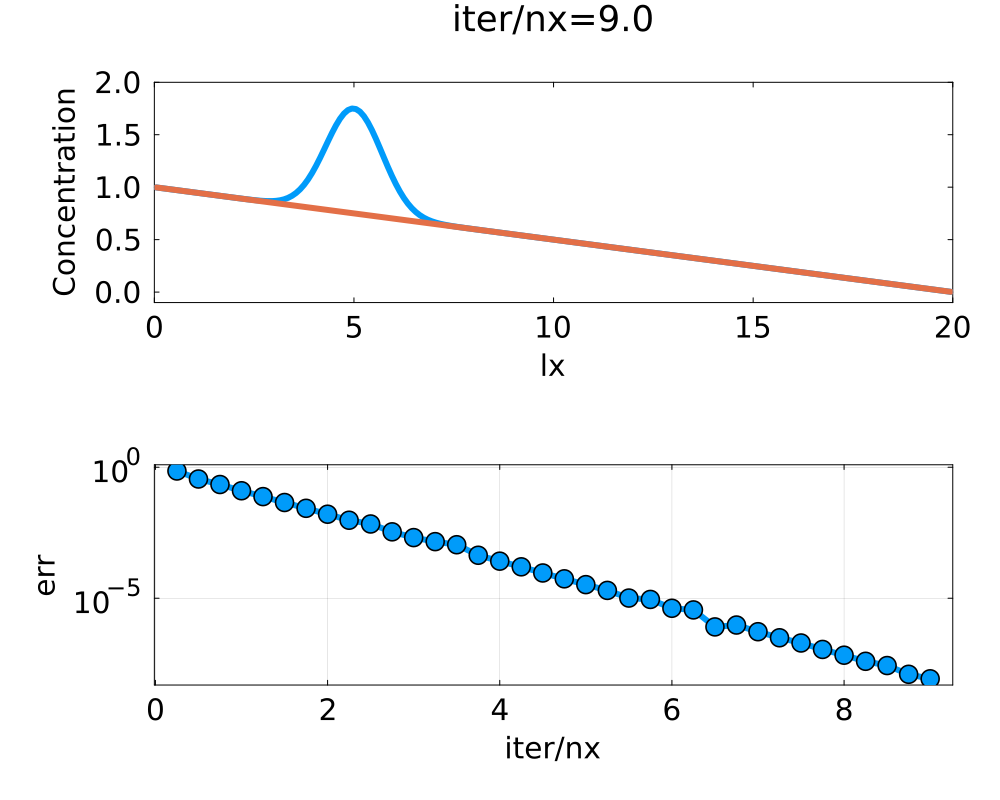

In [16]:
diffusion_1D_conv()